# importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r'VehicleInsuranceData.csv')

In [3]:
df.head(5)

,Unnamed: 0,clv,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location.Code,Marital.Status,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,1,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,2,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,3,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,4,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,5,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# using encoder

In [4]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()

for i in df.columns:
    if isinstance(df[i][0], str):
            df[i] = encoder.fit_transform(df[i])

In [5]:
df.head(2)

,Unnamed: 0,clv,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location.Code,Marital.Status,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,1,2763.519279,0,0,0,1,0,56274,1,1,...,5,0,1,0,2,0,0,384.811147,5,1
1,2,6979.535903,0,1,0,4,0,0,1,2,...,42,0,8,1,5,2,0,1131.464935,0,1


In [14]:
df= df[(df.clv>2500) & (df.clv < 15000)]

In [15]:
df.columns

Index(['Unnamed: 0', 'clv', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location.Code',
       'Marital.Status', 'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Total.Claim.Amount', 'Vehicle.Class', 'Vehicle.Size'],
      dtype='object')

In [16]:
df.shape

(7639, 22)

In [17]:
y=df.clv

# calculating VIF and correlation 

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_vif = add_constant(df)

pd.Series([variance_inflation_factor(X_vif.values, i) 
               for i in range(X_vif.shape[1])], 
              index=X_vif.columns)

const                            56.887859
Unnamed: 0                        1.004274
clv                               1.304703
Response                          1.044686
Coverage                          1.284325
Education                         1.005855
EmploymentStatus                  2.229367
Gender                            1.017301
Income                            2.208245
Location.Code                     1.163676
Marital.Status                    1.141383
Monthly.Premium.Auto              2.425323
Months.Since.Last.Claim           1.006818
Months.Since.Policy.Inception     1.013995
Number.of.Open.Complaints         1.005079
Number.of.Policies                1.106330
Policy.Type                       4.409892
Policy                            4.411223
Renew.Offer.Type                  1.111983
Sales.Channel                     1.026581
Total.Claim.Amount                2.457669
Vehicle.Class                     1.064218
Vehicle.Size                      1.020116
dtype: floa

In [19]:
import scipy.stats as stats

In [20]:
stats.f_oneway(df['EmploymentStatus'],y)


F_onewayResult(statistic=35914.14323446469, pvalue=0.0)

In [21]:
stats.f_oneway(df['Total.Claim.Amount'],y)

F_onewayResult(statistic=31013.0943604431, pvalue=0.0)

In [22]:
stats.f_oneway(df['Policy.Type'],y)

F_onewayResult(statistic=35924.91403848005, pvalue=0.0)

In [23]:
stats.f_oneway(df['Policy'],y)

F_onewayResult(statistic=35891.3325678064, pvalue=0.0)

In [24]:
np.corrcoef(df['Total.Claim.Amount'],y)   #not so correlated

array([[1.        , 0.21907461],
       [0.21907461, 1.        ]])

In [25]:
np.corrcoef(df['Income'],y)    #not correlated

array([[ 1.        , -0.00481093],
       [-0.00481093,  1.        ]])

In [26]:
np.corrcoef(df['Monthly.Premium.Auto'],y)   #not correlated

array([[1.        , 0.39686904],
       [0.39686904, 1.        ]])

In [28]:
np.corrcoef(df['Monthly.Premium.Auto'],y)

array([[1.        , 0.39686904],
       [0.39686904, 1.        ]])

In [29]:
#X = df.drop(['Unnamed: 0','profit','Income','Monthly.Premium.Auto','Total.Claim.Amount'], axis=1)


In [30]:
X = df[['Coverage','Monthly.Premium.Auto','Number.of.Policies','Renew.Offer.Type','Total.Claim.Amount','Vehicle.Class']]
#Coverage	Monthly.Premium.Auto	Number.of.Policies	Renew.Offer.Type	Total.Claim.Amount	Vehicle.Class
X

,Coverage,Monthly.Premium.Auto,Number.of.Policies,Renew.Offer.Type,Total.Claim.Amount,Vehicle.Class
0,0,69,1,0,384.811147,5
1,1,94,8,2,1131.464935,0
2,2,108,2,0,566.472247,5
3,0,106,7,0,529.881344,3
4,0,73,1,0,138.130879,0
...,...,...,...,...,...,...
8625,2,104,1,0,541.282007,0
8626,1,79,1,0,379.200000,0
8627,1,85,2,0,790.784983,0
8628,1,96,3,2,691.200000,0


In [31]:
y

0        2763.519279
1        6979.535903
2       12887.431650
3        7645.861827
4        2813.692575
            ...     
8625     4100.398533
8626     3096.511217
8627     8163.890428
8628     7524.442436
8629     2611.836866
Name: clv, Length: 7639, dtype: float64

In [32]:
X.head(2)

,Coverage,Monthly.Premium.Auto,Number.of.Policies,Renew.Offer.Type,Total.Claim.Amount,Vehicle.Class
0,0,69,1,0,384.811147,5
1,1,94,8,2,1131.464935,0


In [33]:
X.shape

(7639, 6)

In [34]:
from sklearn.model_selection import train_test_split


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

 ## linear regression

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lm= LinearRegression()

In [38]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
lm.coef_

array([ 155.82928777,   42.3406381 ,  287.69432441, -234.95058713,
         -0.66638392,   39.56601712])

In [40]:
predictions= lm.predict(X_test)

Text(0, 0.5, 'predicted values')

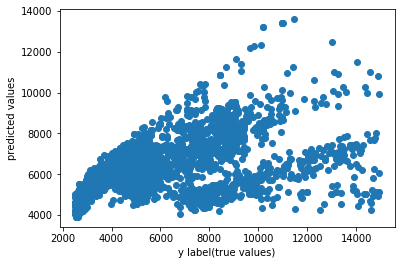

In [41]:
plt.scatter(y_test, predictions)
plt.xlabel('y label(true values)')
plt.ylabel('predicted values')

In [42]:
y_test

764     11315.203730
6697     7630.346461
2772     3528.044252
2940     7294.492993
7957    12989.818060
            ...     
5983     4818.635094
6544     6243.089247
3355     4834.710493
4514     8304.688878
8241     4772.943848
Name: clv, Length: 2292, dtype: float64

In [43]:
from sklearn import metrics

In [44]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2017.2010641733377
MSE: 6714938.327775716
RMSE: 2591.3198042263552


In [45]:
metrics.explained_variance_score(y_test, predictions)

0.21765111381085211

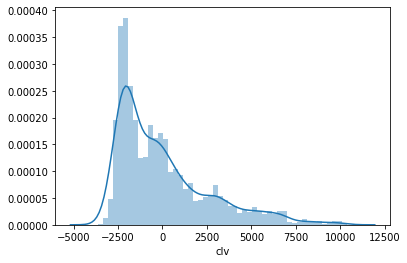

In [46]:
sns.distplot((y_test-predictions), bins=50)

#  log transformation and normalization

In [47]:
drake= np.log(X+1)

In [48]:
from sklearn.preprocessing import StandardScaler 
  
scalar = StandardScaler() 
  
scalar.fit(drake) 
scaled_data = scalar.transform(drake) 

In [49]:
kiki = np.log(y)

In [50]:
lm = LinearRegression()

In [51]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data , kiki, test_size=0.3, random_state=200)

In [52]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
lm.score(X_train,y_train)*100

38.49004520519347

In [54]:
scaled_data = pd.DataFrame(data=scaled_data, columns=['Coverage', 'Monthly.Premium.Auto', 'Number.of.Policies',
       'Renew.Offer.Type', 'Total.Claim.Amount', 'Vehicle.Class'])

In [55]:
scaled_data

,Coverage,Monthly.Premium.Auto,Number.of.Policies,Renew.Offer.Type,Total.Claim.Amount,Vehicle.Class
0,-0.794453,-0.861984,-1.050640,-1.086489,0.194989,1.298211
1,0.937489,0.230598,1.685040,1.086224,1.393962,-0.947815
2,1.950611,0.722437,-0.313163,-1.086489,0.624609,1.298211
3,-0.794453,0.656180,1.470811,-1.086489,0.550393,0.789948
4,-0.794453,-0.663169,-1.050640,-1.086489,-0.940660,-0.947815
...,...,...,...,...,...,...
7634,1.950611,0.588673,-1.050640,-1.086489,0.574052,-0.947815
7635,0.937489,-0.384241,-1.050640,-1.086489,0.178676,-0.947815
7636,0.937489,-0.125495,-0.313163,-1.086489,0.995498,-0.947815
7637,0.937489,0.305138,0.210086,1.086224,0.845834,-0.947815


In [56]:
pred = lm.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score
metrics.explained_variance_score(y_test, pred)*100

40.23383956080414

In [58]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['coeff'])
cdf

,coeff
Coverage,0.003024
Monthly.Premium.Auto,0.208378
Number.of.Policies,0.216943
Renew.Offer.Type,-0.025572
Total.Claim.Amount,-0.006620
Vehicle.Class,-0.000231


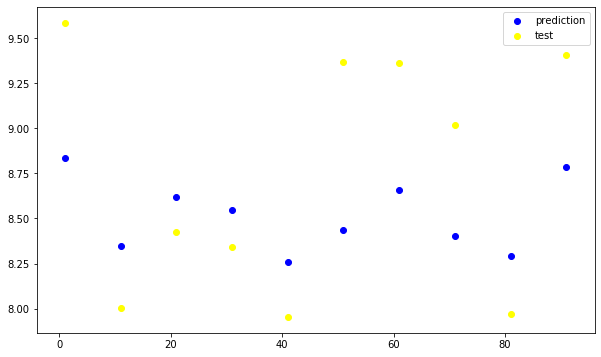

In [59]:
fig=plt.figure(figsize=(10,6))
plt.scatter(np.arange(1,100,10),pred[0:100:10],color='blue')
plt.scatter(np.arange(1,100,10),y_test[0:100:10],color='yellow')

plt.legend(['prediction','test'])

# polynomial regression

In [60]:
scaled_data.shape

(7639, 6)

In [61]:
X.columns

Index(['Coverage', 'Monthly.Premium.Auto', 'Number.of.Policies',
       'Renew.Offer.Type', 'Total.Claim.Amount', 'Vehicle.Class'],
      dtype='object')

In [62]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3) 
X_poly = poly.fit_transform(scaled_data.iloc[:,0].values.reshape(-1,1)) 
  

lin2 = LinearRegression() 
lin2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
X_poly.shape

(7639, 4)

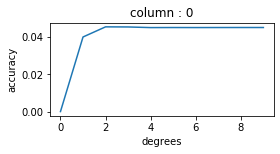

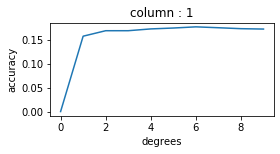

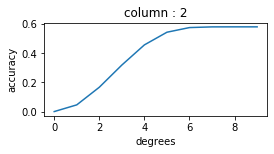

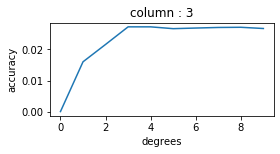

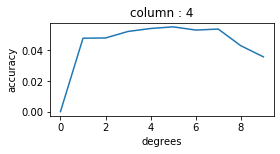

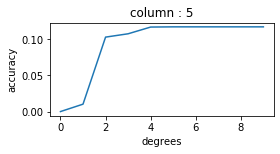

In [64]:
from sklearn.preprocessing import PolynomialFeatures 

def check_exp(inp,degree,out):
    
    poly = PolynomialFeatures(degree = degree) 
    X_poly = poly.fit_transform(inp) 


    lin2 = LinearRegression() 
    lin2.fit(X_poly, out)
    
    return lin2.score(X_poly, out)

for a in range(X.shape[1]):
    acc= []
    for i in range(10):
        acc.append(check_exp(X.iloc[:,a].values.reshape(-1,1), i, y))

    import matplotlib.pyplot as plt
    plt.figure(figsize=(4,X.shape[1]*2))
    sb = (X.shape[1]*10+1)*10+(a+1)
    plt.subplot(sb)
    plt.title('column : '+str(a))
    plt.xlabel('degrees')
    plt.ylabel('accuracy')
    plt.plot(acc)

In [65]:
#FOR EXAMPLE


poly = PolynomialFeatures(degree = 3) 
X_poly1 = poly.fit_transform(X.iloc[:,1].values.reshape(-1,1))

In [66]:
poly=PolynomialFeatures(degree=1)
X_poly= poly.fit_transform(X.iloc[:,0].values.reshape(-1,1))  #0

In [67]:
poly=PolynomialFeatures(degree=1)
X_poly1= poly.fit_transform(X.iloc[:,1].values.reshape(-1,1))  #1

In [68]:
poly=PolynomialFeatures(degree=4)
X_poly2= poly.fit_transform(X.iloc[:,2].values.reshape(-1,1))  #2

In [69]:
poly=PolynomialFeatures(degree=2)
X_poly3= poly.fit_transform(X.iloc[:,3].values.reshape(-1,1))  #3

In [70]:
poly=PolynomialFeatures(degree=1)
X_poly4= poly.fit_transform(X.iloc[:,4].values.reshape(-1,1))  #4

In [71]:
poly=PolynomialFeatures(degree=2)
X_poly5= poly.fit_transform(X.iloc[:,5].values.reshape(-1,1))  #5

In [72]:
Xo = np.concatenate((X_poly,X_poly1,X_poly2,X_poly3,X_poly4,X_poly5), axis=1)

In [73]:
Xo.shape

(7639, 17)

In [74]:
Xo

array([[ 1.,  0.,  1., ...,  1.,  5., 25.],
       [ 1.,  1.,  1., ...,  1.,  0.,  0.],
       [ 1.,  2.,  1., ...,  1.,  5., 25.],
       ...,
       [ 1.,  1.,  1., ...,  1.,  0.,  0.],
       [ 1.,  1.,  1., ...,  1.,  0.,  0.],
       [ 1.,  1.,  1., ...,  1.,  5., 25.]])

In [75]:
y= np.log(y)
y

0       7.924260
1       8.850738
2       9.464008
3       8.941920
4       7.942253
          ...   
8625    8.318839
8626    8.038031
8627    9.007476
8628    8.925912
8629    7.867809
Name: clv, Length: 7639, dtype: float64

In [76]:
y.shape

(7639,)

In [77]:
prm = LinearRegression()

In [78]:
prm.fit(Xo,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
prm.score(Xo,y)

0.8403415646380268

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(Xo, y, test_size=0.33, random_state=42)

In [82]:
X_train.shape , X_test.shape

((5118, 17), (2521, 17))

In [83]:
prm.fit(X_train,y_train)
prm.score(X_train,y_train)

0.8404494650676055

In [84]:
pred = prm.predict(X_test)

In [85]:
pred

array([9.17169156, 9.16316082, 8.17761418, ..., 8.40693757, 8.18190643,
       7.91129256])

In [86]:
y_test

764     9.333903
6697    8.939889
2772    8.168499
2940    8.894875
7957    9.471921
          ...   
2210    8.475315
3012    8.642392
5189    8.473119
4999    8.231058
3988    7.863255
Name: clv, Length: 2521, dtype: float64

In [87]:
from sklearn.metrics import accuracy_score
metrics.explained_variance_score(y_test, pred)

0.8399017554361832

In [88]:
cdf = pd.DataFrame(prm.coef_,columns=['coeff'])
cdf

,coeff
0,0.000000e+00
1,6.789980e-02
2,4.200286e-14
3,7.227431e-03
4,6.696033e-15
5,3.554717e+00
6,-1.255252e+00
7,1.725073e-01
8,-8.085933e-03
9,3.330669e-16


In [89]:
from sklearn import metrics

In [90]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.13968762870762683
MSE: 0.034432890644753536
RMSE: 0.1855610159617411


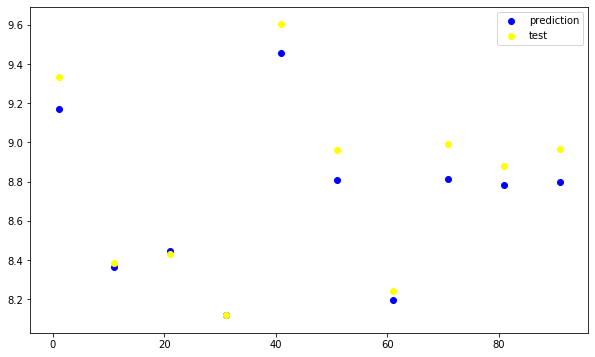

In [91]:
fig=plt.figure(figsize=(10,6))
plt.scatter(np.arange(1,100,10),pred[0:100:10],color='blue')
plt.scatter(np.arange(1,100,10),y_test[0:100:10],color='yellow')

plt.legend(['prediction','test'])

##  doubts:
1) cant calculate accuracy score, using the score code because of the different shapes of train and testing data. please explain
how to do it.

-- for score fn you need to give input and output as parameter not actual output and predicted output.
lm.score(testx,testy)
lm.score(testy,pred) is incorrect

==============================================================================

2) after changing the degrees of columns in polynomial regression why the shape changed i.e column no. increased from 6 to 17?

-- this is because when we transform a column to degree 3 it will generate 4 columns for degrees 0,1,2 and 3. Thats why there is increase in no. or columns

====================================================================================================

3) how to determine the values of coefficients for each column in polynomial reg?

-- .coef_ attribute will give all the coefficients

=====================================================================================================================

4) using LinearRegression() function does this code decides on its own whether to use linear, multilinear reg or poly?

-- code decides single or multilinear for poly we need to generate poly features and the training process is same for all algos so we have same class for all the three

========================================================================================================

5) In the above study which model will be better prediction model: multilinear regression where accuracy is 40% with coefficients values where we can interpret how to increase the clv or polynomial reg where acurracy is 83%?
    
-- The model with the higher and stable accuracy at both train and test dataset

=========================================================================================
    
6) I was working on a data set where i applied Logistic regression, i faced problem in identifying the outlier as the output is binary. do we need to treat outliers in Logistic regression prob?
  
-- outliers can only be treated in continuous data

=====================================================================================================================

    
7) And i did a case study with NB, after runnning the model i achieved the accuracy around 74%, but how can i interpret that model? In NB do we check the coefficients?  

-- In NB we dont need to check the coef. we check the prob it returns the prob for all possible classes. To explore more go through bayes minimum error and bayes minimun risk classification and discriminant function.
 
8) i face problems in interpretation of model. like how to judge which factor will help achieving the target. any tricks and tips to do it. ? 

-- this can not be done in all the models. Instead you can try singnificancy tests or feature importance scores in DTs, bagging and boosting algos, coefs. in linear and logistic models.
   
